# FINM33150 - Quant Trading Strategies
## Homework 1
## University of Chicago


### Author: Laurent Lanteigne
### ID: 12279717
### Date: April 6th, 2021

# 1. Preparing the Data

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import quandl
import functools
import seaborn as sns
import plotnine as p9
import os
from scipy.stats import norm
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

quandl_key = os.environ.get('QUANDL_API_KEY') # Somehow not working 
key = 'EKZnud9W1e-ZGWpeGCEQ'

In [3]:
try:
    # Do not recreate if it already exists
    fetch_quandl
    print("fetch_quandl already defined")
except NameError:
    @functools.lru_cache(maxsize=16)
    def fetch_quandl(my_securities, start, end):
        print("Fetching from Quandl")
        qdata = quandl.get(list(my_securities), returns="pandas",
                          api_key=key,
                          start_date=start, end_date=end)
        return qdata
    print("fetch_quandl has now been newly defined")

fetch_quandl has now been newly defined


In [4]:
start = "2018-12-03"
end = "2020-08-31"
pair1 = ("OWF/ICE_B_B", "OWF/ICE_G_G")
pair2 = ("OWF/CBT_TU_TU", "OWF/CBT_TY_TY")
quarters = "H M U Z".split()
years = "2019 2020".split()

def data_future_tuple(pair, quarters, years):
    first = []
    second = []
    
    for y in years:
        for q in quarters:
            first.append(pair[0]+"_"+q+y+"_IVM")
            second.append(pair[1]+"_"+q+y+"_IVM")
            
    return tuple(first), tuple(second)

W, X = data_future_tuple(pair1, quarters, years)
Y, Z = data_future_tuple(pair2, quarters, years)

raw_dataset1 = []
raw_dataset2 = []
for future in list((W,X)):
    raw_dataset1.append(fetch_quandl(future, start, end))
for future in list((Y,Z)):
    raw_dataset2.append(fetch_quandl(future, start, end))

Fetching from Quandl
Fetching from Quandl
Fetching from Quandl
Fetching from Quandl


In [5]:
raw_dataset1[0].tail()

,OWF/ICE_B_B_H2019_IVM - Future,OWF/ICE_B_B_H2019_IVM - AtM,OWF/ICE_B_B_H2019_IVM - RR25,OWF/ICE_B_B_H2019_IVM - RR10,OWF/ICE_B_B_H2019_IVM - Fly25,OWF/ICE_B_B_H2019_IVM - Fly10,OWF/ICE_B_B_H2019_IVM - Beta1,OWF/ICE_B_B_H2019_IVM - Beta2,OWF/ICE_B_B_H2019_IVM - Beta3,OWF/ICE_B_B_H2019_IVM - Beta4,...,OWF/ICE_B_B_Z2020_IVM - Beta1,OWF/ICE_B_B_Z2020_IVM - Beta2,OWF/ICE_B_B_Z2020_IVM - Beta3,OWF/ICE_B_B_Z2020_IVM - Beta4,OWF/ICE_B_B_Z2020_IVM - Beta5,OWF/ICE_B_B_Z2020_IVM - Beta6,OWF/ICE_B_B_Z2020_IVM - MinMoney,OWF/ICE_B_B_Z2020_IVM - MaxMoney,OWF/ICE_B_B_Z2020_IVM - DtE,OWF/ICE_B_B_Z2020_IVM - DtT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.435382,1.538564,5.243932,3.489592,-26.443394,-41.872588,-0.475591,0.339163,62.85,66.0
2020-08-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.457185,1.574857,5.760724,3.827848,-29.094475,-46.000876,-0.456781,0.340879,61.85,65.0
2020-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.474298,1.473948,5.854284,4.883061,-28.995342,-47.495209,-0.478955,0.345529,60.85,64.0
2020-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.452518,1.591287,5.253284,3.241172,-25.963334,-39.968163,-0.484157,0.344165,59.85,63.0
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.459053,1.766074,5.209112,1.827961,-25.332647,-35.132694,-0.489018,0.337660,56.85,60.0


In [6]:
def clean_quandl_columns(dataframe):
    replacement_columns = {}
    for c in dataframe.columns:
        series_name, variable = c.split(' - ')
        source_name, asset = series_name.split('/')
        replacement_columns[c] = asset+":"+variable
    renamed_data = dataframe.rename(columns=replacement_columns)
    return renamed_data

for i in range(len(raw_dataset1)):
    raw_dataset1[i] = clean_quandl_columns(raw_dataset1[i])
    raw_dataset2[i] = clean_quandl_columns(raw_dataset2[i])

In [7]:
raw_dataset1[0].tail()

,ICE_B_B_H2019_IVM:Future,ICE_B_B_H2019_IVM:AtM,ICE_B_B_H2019_IVM:RR25,ICE_B_B_H2019_IVM:RR10,ICE_B_B_H2019_IVM:Fly25,ICE_B_B_H2019_IVM:Fly10,ICE_B_B_H2019_IVM:Beta1,ICE_B_B_H2019_IVM:Beta2,ICE_B_B_H2019_IVM:Beta3,ICE_B_B_H2019_IVM:Beta4,...,ICE_B_B_Z2020_IVM:Beta1,ICE_B_B_Z2020_IVM:Beta2,ICE_B_B_Z2020_IVM:Beta3,ICE_B_B_Z2020_IVM:Beta4,ICE_B_B_Z2020_IVM:Beta5,ICE_B_B_Z2020_IVM:Beta6,ICE_B_B_Z2020_IVM:MinMoney,ICE_B_B_Z2020_IVM:MaxMoney,ICE_B_B_Z2020_IVM:DtE,ICE_B_B_Z2020_IVM:DtT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.435382,1.538564,5.243932,3.489592,-26.443394,-41.872588,-0.475591,0.339163,62.85,66.0
2020-08-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.457185,1.574857,5.760724,3.827848,-29.094475,-46.000876,-0.456781,0.340879,61.85,65.0
2020-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.474298,1.473948,5.854284,4.883061,-28.995342,-47.495209,-0.478955,0.345529,60.85,64.0
2020-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.452518,1.591287,5.253284,3.241172,-25.963334,-39.968163,-0.484157,0.344165,59.85,63.0
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.459053,1.766074,5.209112,1.827961,-25.332647,-35.132694,-0.489018,0.337660,56.85,60.0


In [8]:
def shrink_dataset(pair, raw_dataset, years, quarters):
    datasets = []
    for count, future in enumerate(pair):
        truncated_dataset = pd.DataFrame(index = raw_dataset[count].index)
        source_name, asset = future.split('/')

        for y in years:
            for q in quarters:
                contract = asset + '_' + q + y + '_IVM'
                dataset = raw_dataset[count][raw_dataset[count][contract + ":DtT"] > 30]
                future_price = dataset[[contract + ":Future", contract + ":DtT"]]
                truncated_dataset = pd.concat([truncated_dataset,future_price], axis = 1)
        
        datasets.append(truncated_dataset)
        
    return tuple(datasets)

shrink_W, shrink_X = shrink_dataset(pair1, raw_dataset1, years, quarters)
shrink_Y, shrink_Z = shrink_dataset(pair2, raw_dataset2, years, quarters)
shrink_lst1 = [shrink_W, shrink_X]
shrink_lst2 = [shrink_Y, shrink_Z]


In [9]:
shrink_W

,ICE_B_B_H2019_IVM:Future,ICE_B_B_H2019_IVM:DtT,ICE_B_B_M2019_IVM:Future,ICE_B_B_M2019_IVM:DtT,ICE_B_B_U2019_IVM:Future,ICE_B_B_U2019_IVM:DtT,ICE_B_B_Z2019_IVM:Future,ICE_B_B_Z2019_IVM:DtT,ICE_B_B_H2020_IVM:Future,ICE_B_B_H2020_IVM:DtT,ICE_B_B_M2020_IVM:Future,ICE_B_B_M2020_IVM:DtT,ICE_B_B_U2020_IVM:Future,ICE_B_B_U2020_IVM:DtT,ICE_B_B_Z2020_IVM:Future,ICE_B_B_Z2020_IVM:DtT
Date,,,,,,,,,,,,,,,,
2018-12-03,61.82,59.0,62.17,148.0,62.13,240.0,62.01,332.0,62.03,424.0,62.03,514.0,61.94,606.0,61.88,697.0
2018-12-04,62.22,58.0,62.69,147.0,62.74,239.0,62.64,331.0,62.64,423.0,62.64,513.0,62.54,605.0,62.47,696.0
2018-12-05,61.76,57.0,62.32,146.0,62.39,238.0,62.29,330.0,62.29,422.0,62.29,512.0,62.20,604.0,62.14,695.0
2018-12-06,60.33,56.0,60.99,145.0,61.13,237.0,61.06,329.0,61.09,421.0,61.14,511.0,61.07,603.0,61.02,694.0
2018-12-07,61.85,55.0,62.32,144.0,62.32,236.0,62.14,328.0,62.06,420.0,61.98,510.0,61.79,602.0,61.59,693.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.66,66.0
2020-08-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.58,65.0
2020-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.01,64.0


In [10]:
def grab_future_price(pair, dfs, years, quarters):
    
    future_prices = pd.DataFrame(index = dfs[0].index)
    
    for count, future in enumerate(pair):
        
        source_name, asset = future.split('/')
        future_prices[asset] = np.zeros(len(future_prices))
        price_idx = []
        dte_idx = []
        for y in years:
            for q in quarters:
                price_idx.append(asset+'_'+ q +y+'_IVM:Future')
                dte_idx.append(asset+'_'+q + y+'_IVM:DtT')
                
        for date in future_prices.index:
            # Finds which of the contract has the lowest DtT while greater than 30
            contract_idx = dfs[count].loc[date][dte_idx].argmin()
            # Extract the price of the contract 
            price = dfs[count].loc[date][price_idx][contract_idx]
            future_prices[asset].loc[date] = price
        
    return future_prices

In [11]:
first_pair = grab_future_price(pair1, shrink_lst1, years, quarters)
second_pair = grab_future_price(pair2, shrink_lst2, years, quarters)
future_datasets = list((first_pair, second_pair))

In [12]:
first_pair['ICE_G_G'] *= (1/7.45)
first_pair.tail()

,ICE_B_B,ICE_G_G
Date,,
2020-08-25,46.66,52.516779
2020-08-26,46.58,51.744966
2020-08-27,46.01,50.771812
2020-08-28,46.25,51.241611
2020-08-31,45.66,50.738255


In [13]:
first_pair['Spread'] = first_pair[first_pair.columns[1]] - first_pair[first_pair.columns[0]]
first_pair['Spread Returns'] = first_pair.Spread.pct_change()
second_pair['Spread'] = second_pair[second_pair.columns[1]] - second_pair[second_pair.columns[0]]
second_pair['Spread Returns'] = second_pair.Spread.pct_change()


In [14]:
first_pair.loc['2019-06-27']

ICE_B_B           65.670000
ICE_G_G           80.469799
Spread            14.799799
Spread Returns    -0.035861
Name: 2019-06-27 00:00:00, dtype: float64

In [15]:
second_pair.loc['2019-08-19']

CBT_TU_TU         107.796875
CBT_TY_TY         130.437500
Spread             22.640625
Spread Returns     -0.015959
Name: 2019-08-19 00:00:00, dtype: float64

Both value on the spreads matches what is given in the pdf.

# 2. Analysis
## 2.1 First Pair

Let's look at the correlation between the two assets to begin with. 

In [16]:
first_pair['ICE_G_G'].corr(first_pair['ICE_B_B'])

0.984342652878446

Both assets look very correlated to each other, let's look at the spread and how much it varies over time.

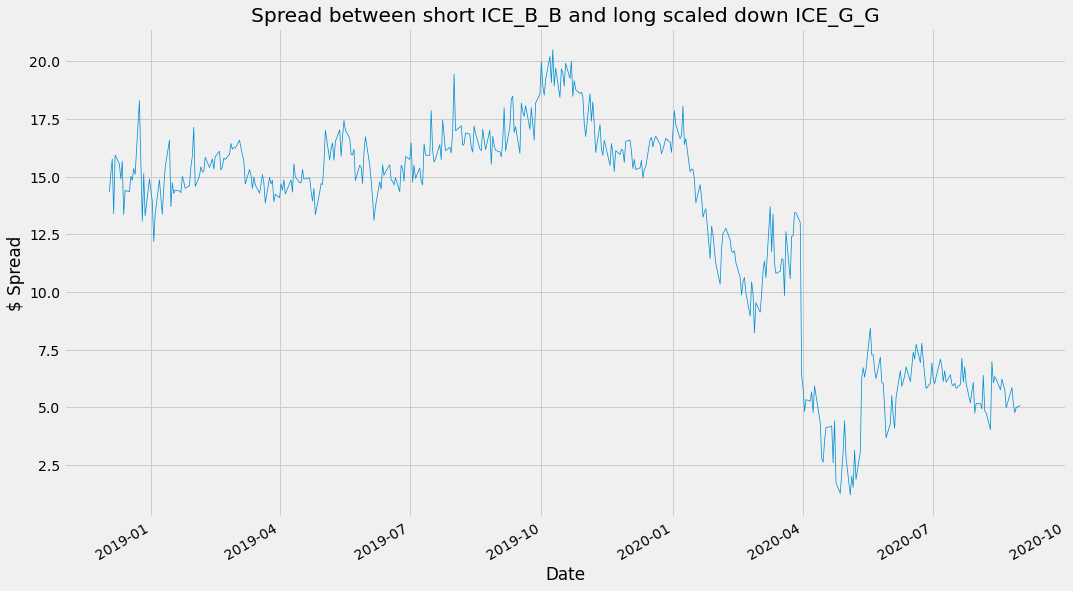

In [17]:
plt.figure(figsize=(16,10))

first_pair['Spread'].plot(lw=0.75)
plt.title('Spread between short ICE_B_B and long scaled down ICE_G_G')
plt.xlabel('Date')
plt.ylabel('$ Spread')
plt.show()

We see a big difference shift between the spread starting in 2020 and accentuating in April of 2020. Let's look at the returns. 

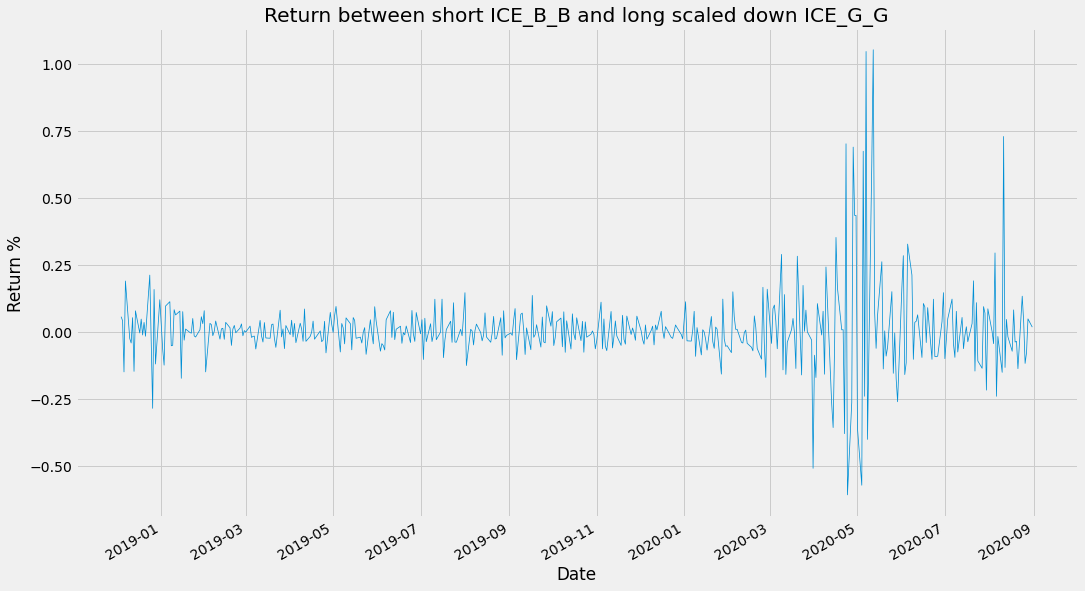

In [18]:
plt.figure(figsize=(16,10))

first_pair['Spread Returns'].plot(lw=0.75)
plt.title('Return between short ICE_B_B and long scaled down ICE_G_G')
plt.xlabel('Date')
plt.ylabel('Return %')
plt.show()

Here we observe similar to the previous graph, mainly the erratic behavior around the news of the COVID virus. Normalizing our returns and looking at the distribution

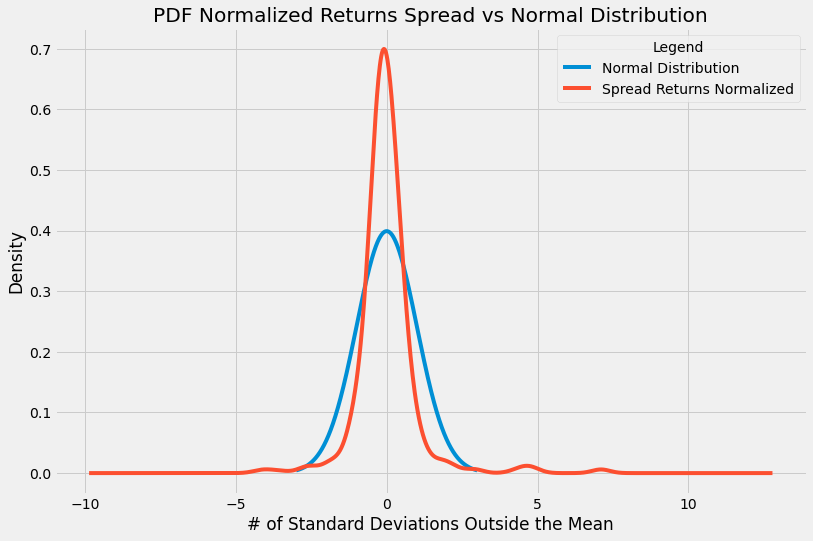

In [19]:
x = np.arange(-3,3,0.001)
y = pd.Series(norm.pdf(x,0,1), index = x, name = 'Normal Distribution')

mean = first_pair['Spread Returns'].mean()
std = first_pair['Spread Returns'].std()
first_pair['Spread Returns Normalized'] = (first_pair['Spread Returns'] - mean)/std

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x,y, label = 'Normal Distribution')
first_pair['Spread Returns Normalized'].plot.kde()
ax.set_xlabel('# of Standard Deviations Outside the Mean')
ax.set_title('PDF Normalized Returns Spread vs Normal Distribution')
plt.legend(loc='upper right', title='Legend')


Looking at the graph we see that the normalized spread does not have a standard normal distribution and that there is some positive-skew in the left-side of the tail. In terms of kurtosis it seems like the kurtosis of our spread is much higher than a standard normal gaussian distribution.

Let's now grab some statistics from return of the spread.

In [20]:
stats = pd.DataFrame(data = None, columns = ['Spread Returns'], index = ['Mean', 'Median', 'Std Dev','1st Quartile', '3rd Quartile', 'Skew', 'Kurtosis'])
data = first_pair['Spread Returns']

stats.loc['Mean'] = data.mean()
stats.loc['Median'] = data.median()
stats.loc['Std Dev'] = data.std()
stats.loc['1st Quartile'] = data.quantile(0.25)
stats.loc['3rd Quartile'] = data.quantile(0.75)
stats.loc['Skew'] = sp.stats.skew(data.dropna())
stats.loc['Kurtosis'] = sp.stats.kurtosis(data.dropna())

stats

,Spread Returns
Mean,0.007569
Median,-0.00307
Std Dev,0.146872
1st Quartile,-0.043516
3rd Quartile,0.048236
Skew,2.27523
Kurtosis,16.463511


Here we can observe how high the kurtosis is for the returns of the spread and also note the positive skew in the distribution. Let's look at rolling windows and some statistics regarding them.

In [21]:
df_stats = pd.DataFrame(data = None, columns = ['Rolling Window Time', 'Median', 'Std Dev','1st Quartile', '3rd Quartile'], index = np.arange(20))

for count, w in enumerate(np.linspace(5,100,20)):
    data = first_pair['Spread'] - first_pair['Spread'].rolling(int(w)).mean()
    df_stats.loc[count] = [int(w), data.median(), data.std(), data.quantile(0.25), data.quantile(0.75)]
df_stats.set_index(['Rolling Window Time'])

,Median,Std Dev,1st Quartile,3rd Quartile
Rolling Window Time,,,,
5,-0.074537,0.81962,-0.401309,0.377362
10,-0.102503,1.09386,-0.585604,0.449114
15,-0.079989,1.303351,-0.738635,0.534735
20,-0.080993,1.469936,-0.831294,0.625683
25,-0.04676,1.615774,-0.967316,0.667435
30,-0.067186,1.746722,-1.041584,0.730345
35,-0.072942,1.851125,-1.172156,0.800622
40,-0.078523,1.933978,-1.207348,0.882853
45,-0.155344,1.997507,-1.253123,0.844297


We see that the statistics gotten above agree with the distribution graph previously generated. Because the Median is negative we observe that the absolute value of the 1st quartile is higher than the 3rd quartile. Let's look at the moments of the distributions for more insights. 

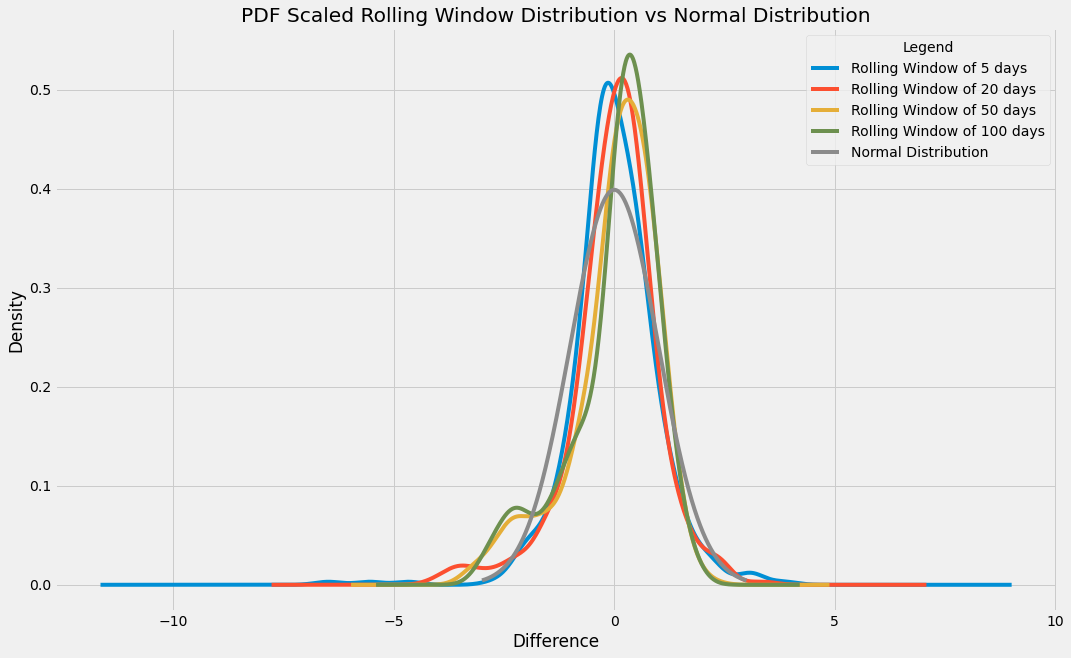

In [22]:
plt.figure(figsize=(16,10))

windows = [5,20,50,100]

for w in windows:
    data = first_pair['Spread'] - first_pair['Spread'].rolling(int(w)).mean()
    data = (data - data.mean())/data.std()
    l = 'Rolling Window of ' + str(w) +' days'
    data.plot.kde(label = l)
y.plot()
plt.xlabel('Difference')
plt.title('PDF Scaled Rolling Window Distribution vs Normal Distribution')
plt.legend(loc='upper right', title='Legend')

There seem to be some negative skew and some positive kurtosis going on compared to the normal distribution. Also worth nothing that the probability density in the left side of the tail is greater for the rolling windows.

In [23]:
moments_stats = pd.DataFrame(data = None, columns = ['Mean', 'Std Dev','Skew', 'Kurtosis'], index = windows)
moments_stats.index.rename('Rolling Window Time', inplace = True)
for w in windows:
    data = first_pair['Spread'] - first_pair['Spread'].rolling(int(w)).mean()
    moments_stats['Mean'].loc[w] = data.dropna().mean()
    moments_stats['Std Dev'].loc[w] = data.dropna().std()
    moments_stats['Skew'].loc[w] = sp.stats.skew(data.dropna())
    moments_stats['Kurtosis'].loc[w] = sp.stats.kurtosis(data.dropna())
moments_stats

,Mean,Std Dev,Skew,Kurtosis
Rolling Window Time,,,,
5,-0.042804,0.81962,-0.861385,7.137385
20,-0.206628,1.469936,-0.826946,2.676978
50,-0.563317,2.058614,-1.078178,1.020529
100,-1.297894,2.986336,-1.067913,0.710814


First thing to notice is how high the kurtosis is for each window but it seems to be decreasing over time to approach the kurtosis of a normal distribution. The other is how the skew is negative for each of the rolling window. 

In [24]:
rolling_win_df = pd.DataFrame(index = first_pair.index, columns = "5-day 20-day 50-day 100-day".split())
for w in windows:
    data = first_pair['Spread Returns'] - first_pair['Spread Returns'].rolling(int(w)).mean()
    rolling_win_df[str(w)+'-day'] = data
rolling_win_df

,5-day,20-day,50-day,100-day
Date,,,,
2018-12-03,NaN,NaN,NaN,NaN
2018-12-04,NaN,NaN,NaN,NaN
2018-12-05,NaN,NaN,NaN,NaN
2018-12-06,NaN,NaN,NaN,NaN
2018-12-07,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-08-25,0.046327,0.019742,0.031663,0.002864
2020-08-26,-0.094026,-0.127170,-0.120412,-0.151487
2020-08-27,-0.045496,-0.094103,-0.079590,-0.112226


Let's now look if the original spread shows some autocorrelation.

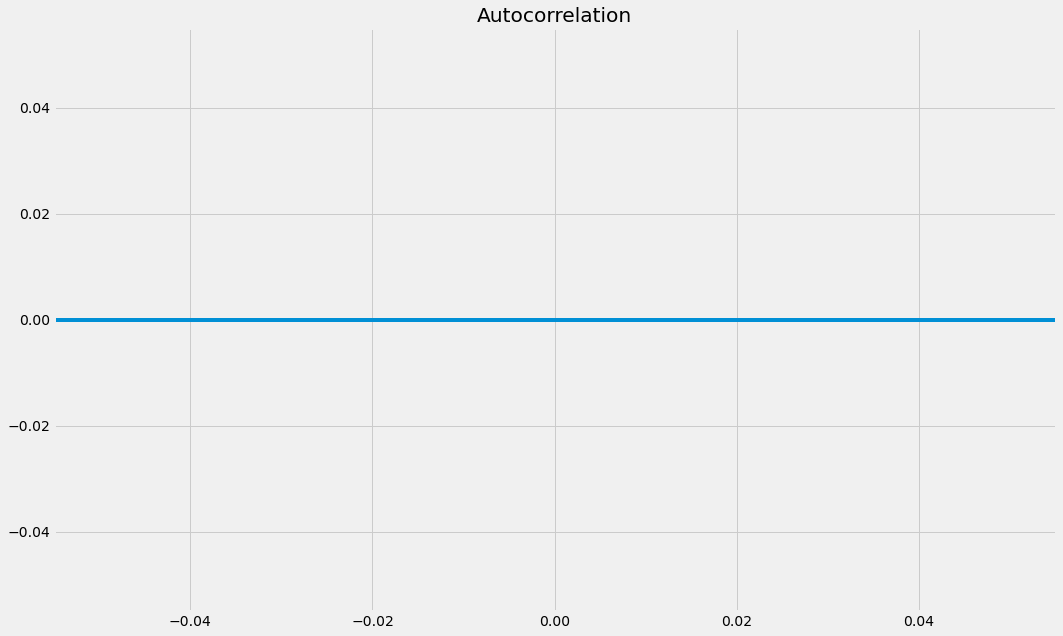

In [25]:
fig1, ax = plt.subplots(figsize=(16,10))
fig1 = sm.graphics.tsa.plot_acf(first_pair['Spread Returns'], ax = ax, lags = 50)

The spreads returns shows no autocorrelation, let's look at the Augmented Dickey Fuller Test. 

In [26]:
ADF_spread = sm.tsa.stattools.adfuller(first_pair['Spread Returns'].dropna().values)
print("ADF Stat: {:.4f} \n p-value: {:.4f}".format(ADF_spread[0], ADF_spread[1]))

ADF Stat: -5.0416 
 p-value: 0.0000


With a ADF value greater less (-3.44, -2.87) which are the critical values for the sample size and (1%,5%) confidence interval for t-distribution for sample ~500. Compined with the p-value we can say with confidence that we are dealing with a stationary process here. Let's look if there is any seasonality in the price.

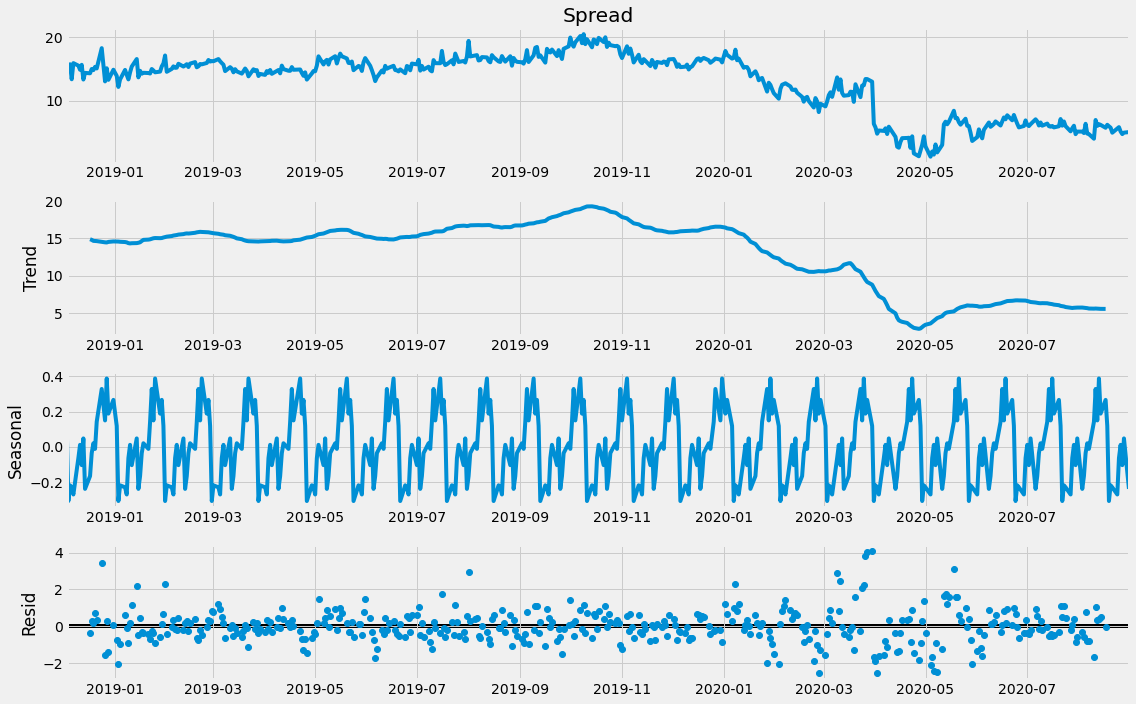

In [27]:
seasonality = sm.tsa.seasonal_decompose(first_pair['Spread'], model='additive', period=20)
plt.rcParams['figure.figsize'] = [16,10]
seasonality.plot()
plt.show()

It seems like we have seasonality in our time-series so let's see what our spreads looks like once we take that seasonality out. Also, note the more erratic behavior of the residuals around the announcement of COVID.

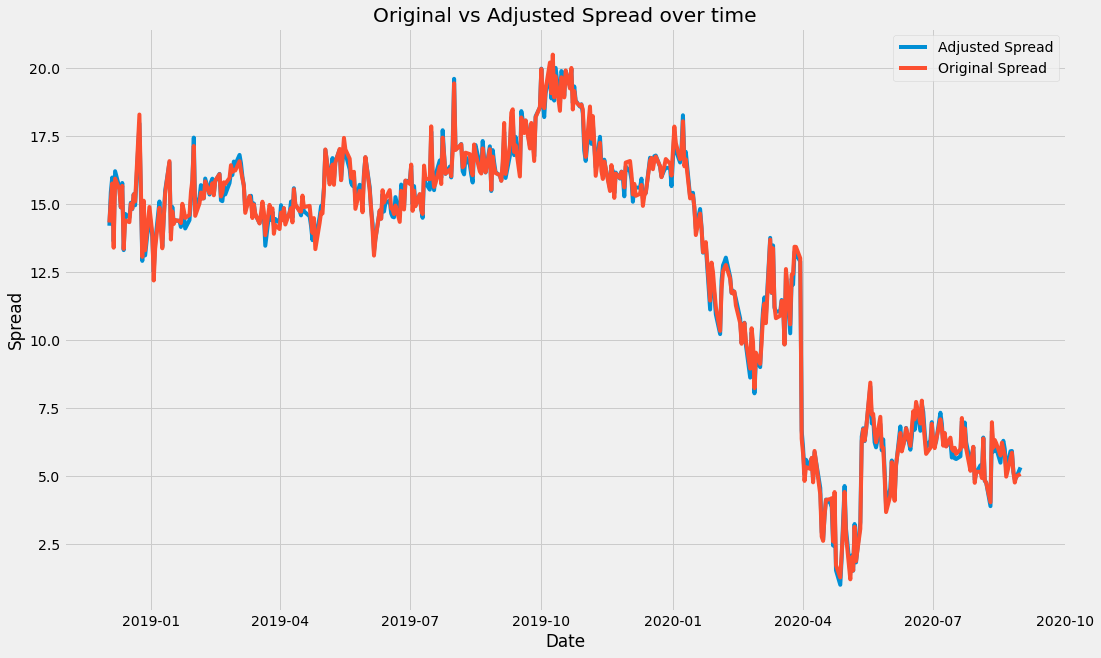

In [28]:
adj_spread = first_pair['Spread'] - seasonality.seasonal.dropna().to_frame('Seasonal')['Seasonal']
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(adj_spread, label = 'Adjusted Spread')
ax.plot(first_pair['Spread'], label = 'Original Spread')
ax.set_xlabel("Date")
ax.set_ylabel('Spread')
ax.set_title('Original vs Adjusted Spread over time')
plt.legend()

We seasonality component is too small to have a significant impact and we can observe this by looking at the correlation between the two time series. 

In [29]:
first_pair['Spread'].corr(adj_spread)

0.9991024029457615

Which is nearly 1, if seasonality had an strong impact than we would get a smaller correlation between the two time-series, say it made it stationary. 

## 2.2 Second Pair

Let's look how correlated both assets are.

In [30]:
second_pair['CBT_TU_TU'].corr(second_pair['CBT_TY_TY'])

0.9939165654020458

Again both assets seems highly correlated, let's now look at the evolution of the spread over time. 

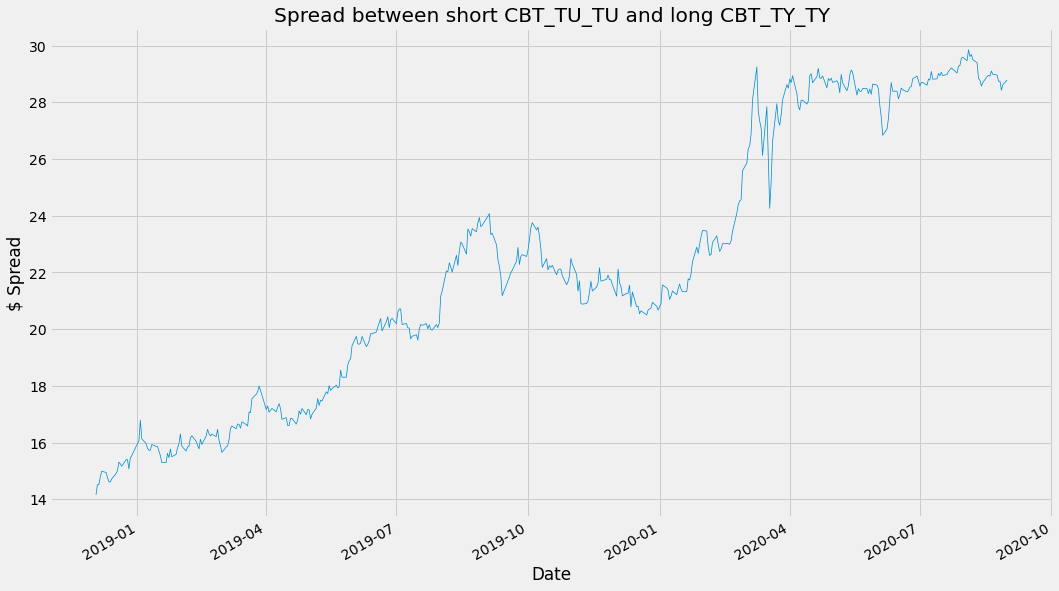

In [31]:
plt.figure(figsize=(16,10))

second_pair['Spread'].plot(lw=0.75)
plt.title('Spread between short CBT_TU_TU and long CBT_TY_TY')
plt.xlabel('Date')
plt.ylabel('$ Spread')
plt.show()

We see a general trend up until 2020, where the trend accelerated until news about the pandemic started becoming the major point of discussion where we see a V shape in the spread. Let's look at the returns.  

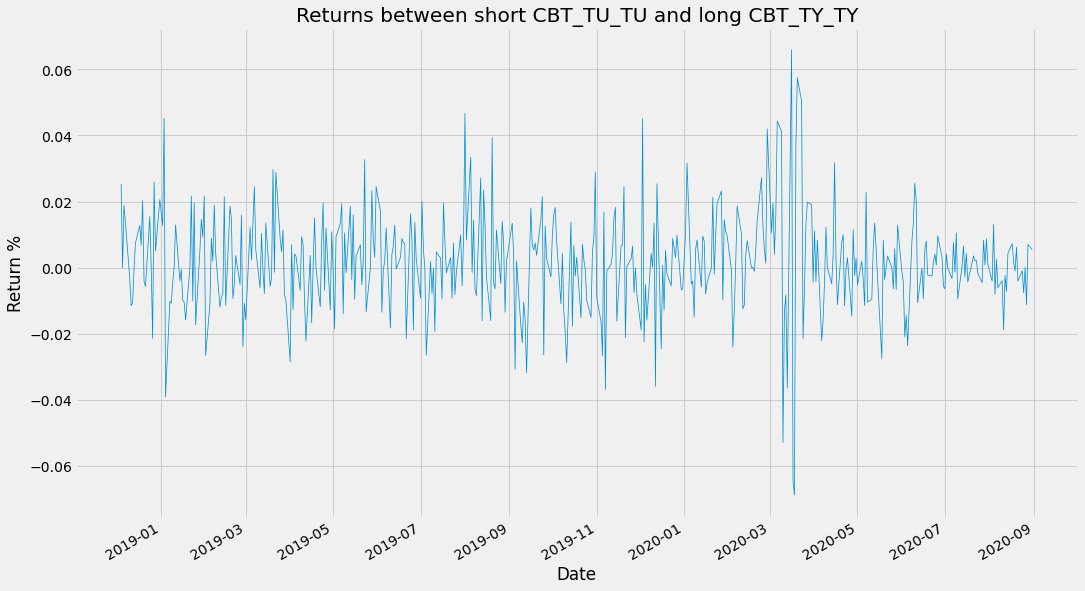

In [32]:
plt.figure(figsize=(16,10))

second_pair['Spread Returns'].plot(lw=0.75)
plt.title('Returns between short CBT_TU_TU and long CBT_TY_TY')
plt.xlabel('Date')
plt.ylabel('Return %')
plt.show()

Here we observe similar to the previous graph, mainly the erratic behavior around the news of the COVID virus. Also, compared to the other spread, the behavior here seems to have a larger variance. Let's look at the normalized distribution vs standard normal distribution.

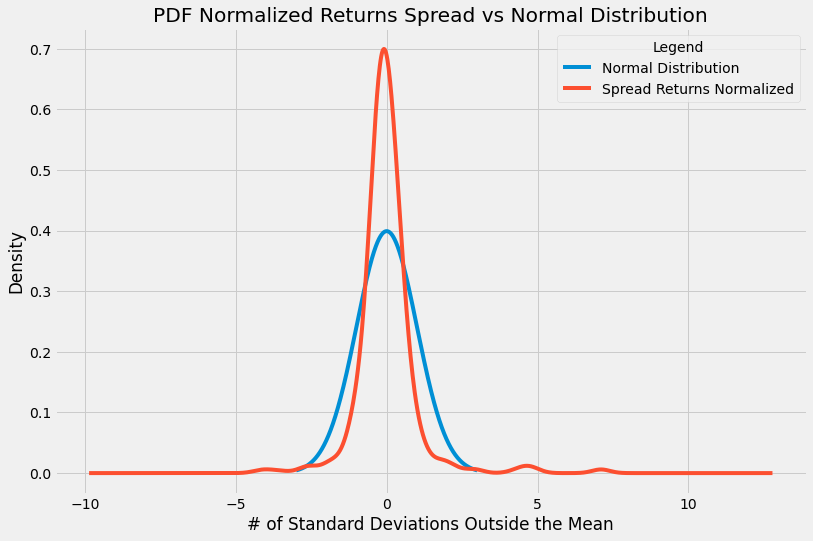

In [33]:
x = np.arange(-3,3,0.001)
y = pd.Series(norm.pdf(x,0,1), index = x, name = 'Normal Distribution')

mean = second_pair['Spread Returns'].mean()
std = second_pair['Spread Returns'].std()
second_pair['Spread Returns Normalized'] = (second_pair['Spread Returns'] - mean)/std

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x,y, label = 'Normal Distribution')
first_pair['Spread Returns Normalized'].plot.kde()
ax.set_xlabel('# of Standard Deviations Outside the Mean')
ax.set_title('PDF Normalized Returns Spread vs Normal Distribution')
plt.legend(loc='upper right', title='Legend')


Looking at the graph we see that the normalized spread does not have a standard normal distribution and that there is some positive-skew in the left-side of the tail. In terms of kurtosis it seems like the kurtosis of our spread is much higher than a standard normal gaussian distribution.

Let's now grab some statistics from return of the spread.

In [34]:
stats2 = pd.DataFrame(data = None, columns = ['Spread Returns'], index = ['Mean', 'Median', 'Std Dev','1st Quartile', '3rd Quartile', 'Skew', 'Kurtosis'])
data = second_pair['Spread Returns']

stats2.loc['Mean'] = data.mean()
stats2.loc['Median'] = data.median()
stats2.loc['Std Dev'] = data.std()
stats2.loc['1st Quartile'] = data.quantile(0.25)
stats2.loc['3rd Quartile'] = data.quantile(0.75)
stats2.loc['Skew'] = sp.stats.skew(data.dropna())
stats2.loc['Kurtosis'] = sp.stats.kurtosis(data.dropna())

stats2

,Spread Returns
Mean,0.001694
Median,0.00196
Std Dev,0.015492
1st Quartile,-0.00698
3rd Quartile,0.009769
Skew,-0.022433
Kurtosis,2.666316


Our initial assumption that there was some positive skew is wrong,in this case the skew is slightly negative. As for the kurtosis, much less than the first pair but still greater than normal. Let's now look at some statistics regarding rolling windows. 

In [35]:
df_stats2 = pd.DataFrame(data = None, columns = ['Rolling Window Time', 'Median', 'Std Dev','1st Quartile', '3rd Quartile'], index = np.arange(20))

for count, w in enumerate(np.linspace(5,100,20)):
    data = second_pair['Spread'] - second_pair['Spread'].rolling(int(w)).mean()
    df_stats2.loc[count] = [int(w), data.median(), data.std(), data.quantile(0.25), data.quantile(0.75)]
df_stats2.set_index(['Rolling Window Time'])

,Median,Std Dev,1st Quartile,3rd Quartile
Rolling Window Time,,,,
5,0.058906,0.371133,-0.108203,0.237344
10,0.136563,0.554702,-0.139609,0.397656
15,0.194896,0.668197,-0.146094,0.483672
20,0.248828,0.756922,-0.149609,0.644219
25,0.312969,0.834537,-0.174969,0.757562
30,0.357031,0.913476,-0.161328,0.912865
35,0.397924,0.988766,-0.101451,1.09644
40,0.457461,1.061416,-0.085586,1.278125
45,0.511094,1.132517,-0.030356,1.467413


First thing to notice is how the median is increasing as the rolling window time increases, which is a result of the upward trend. The absolute value of the third quartile is bigger than the first quartile but so is the median so we need to look deeper into the statistics to have more information.

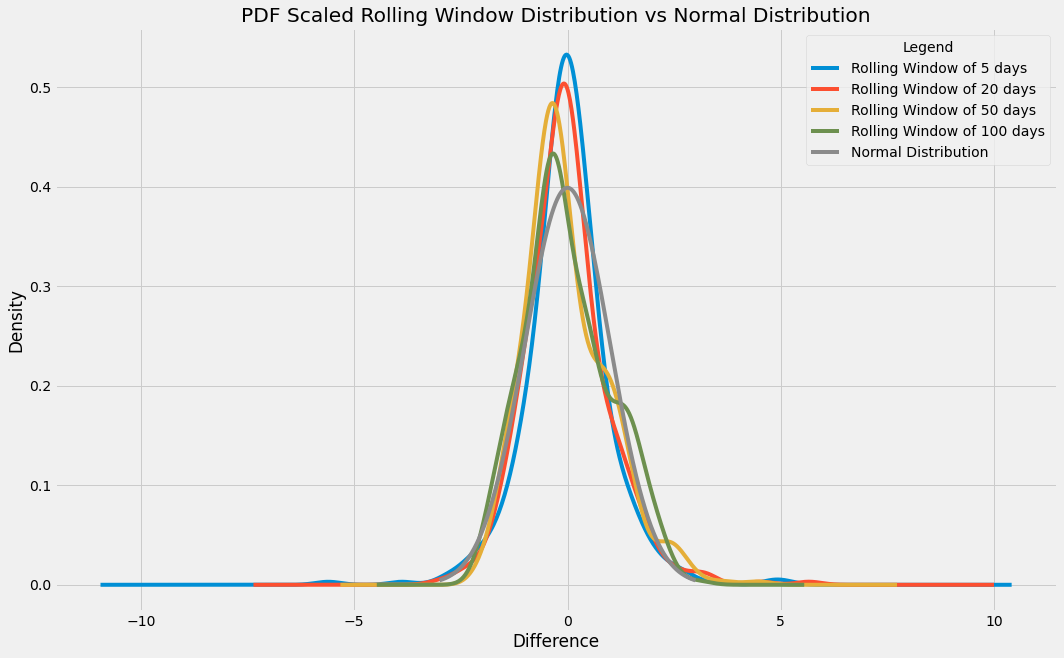

In [36]:
plt.figure(figsize=(16,10))

windows = [5,20,50,100]

for w in windows:
    data = second_pair['Spread'] - second_pair['Spread'].rolling(int(w)).mean()
    data = (data - data.mean())/data.std()
    l = 'Rolling Window of ' + str(w) +' days'
    data.plot.kde(label = l)
y.plot()
plt.xlabel('Difference')
plt.title('PDF Scaled Rolling Window Distribution vs Normal Distribution')
plt.legend(loc='upper right', title='Legend')

There seem to be some positive skew and some positive kurtosis going on compared to the normal distribution. Also worth nothing that the probability density in the right side of the tail seems greater for the rolling windows.

In [37]:
moments_stats2 = pd.DataFrame(data = None, columns = ['Mean', 'Std Dev','Skew', 'Kurtosis'], index = windows)
moments_stats2.index.rename('Rolling Window Time', inplace = True)

for w in windows:
    data = second_pair['Spread'] - second_pair['Spread'].rolling(int(w)).mean()
    moments_stats2['Mean'].loc[w] = data.dropna().mean()
    moments_stats2['Std Dev'].loc[w] = data.dropna().std()
    moments_stats2['Skew'].loc[w] = sp.stats.skew(data.dropna())
    moments_stats2['Kurtosis'].loc[w] = sp.stats.kurtosis(data.dropna())
moments_stats2

,Mean,Std Dev,Skew,Kurtosis
Rolling Window Time,,,,
5,0.062801,0.371133,0.091934,5.083348
20,0.301383,0.756922,0.910875,3.454892
50,0.808798,1.205405,0.850724,1.121935
100,1.726057,1.729135,0.348534,-0.438261


The mean seems to be increasing as the rolling window increases as noted before. For each of the rolling window time periods, we can observe some positive skew and some positive kurtosis except for a rolling window time period of 100 days. We can apply further testing by checking for normality of rolling windows using a Shapiro-Wilk test.

In [38]:
shap_wilk = pd.DataFrame(data = None, columns = ['Shapiro Statistics', 'p-value'], index = windows)
shap_wilk.index.rename('Rolling Window Time', inplace = True)

for w in windows:
    data = second_pair['Spread'] - second_pair['Spread'].rolling(int(w)).mean()
    
    shap_wilk['Shapiro Statistics'].loc[w] = sp.stats.shapiro(data.dropna())[0]
    shap_wilk['p-value'].loc[w] = "{:.4f}".format(sp.stats.shapiro(data.dropna())[1])
shap_wilk

,Shapiro Statistics,p-value
Rolling Window Time,,
5,0.937621,0.0000
20,0.953549,0.0000
50,0.958232,0.0000
100,0.979897,0.0001


Giving that the p-value is significantly lower than 0.05 and even 0.01 we cannot reject that the rolling windows of the spread are drawn from a normal distribution. 

In [39]:
rolling_win_df2 = pd.DataFrame(index = second_pair.index, columns = "5-day 20-day 50-day 100-day".split())
for w in windows:
    data = second_pair['Spread Returns'] - second_pair['Spread Returns'].rolling(int(w)).mean()
    rolling_win_df2[str(w)+'-day'] = data
rolling_win_df2

,5-day,20-day,50-day,100-day
Date,,,,
2018-12-03,NaN,NaN,NaN,NaN
2018-12-04,NaN,NaN,NaN,NaN
2018-12-05,NaN,NaN,NaN,NaN
2018-12-06,NaN,NaN,NaN,NaN
2018-12-07,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-08-25,-0.006113,-0.006660,-0.008007,-0.007912
2020-08-26,0.001290,0.000985,-0.000293,-0.000348
2020-08-27,-0.006438,-0.009219,-0.011108,-0.011313


Let's now look if the original spread shows some autocorrelation.

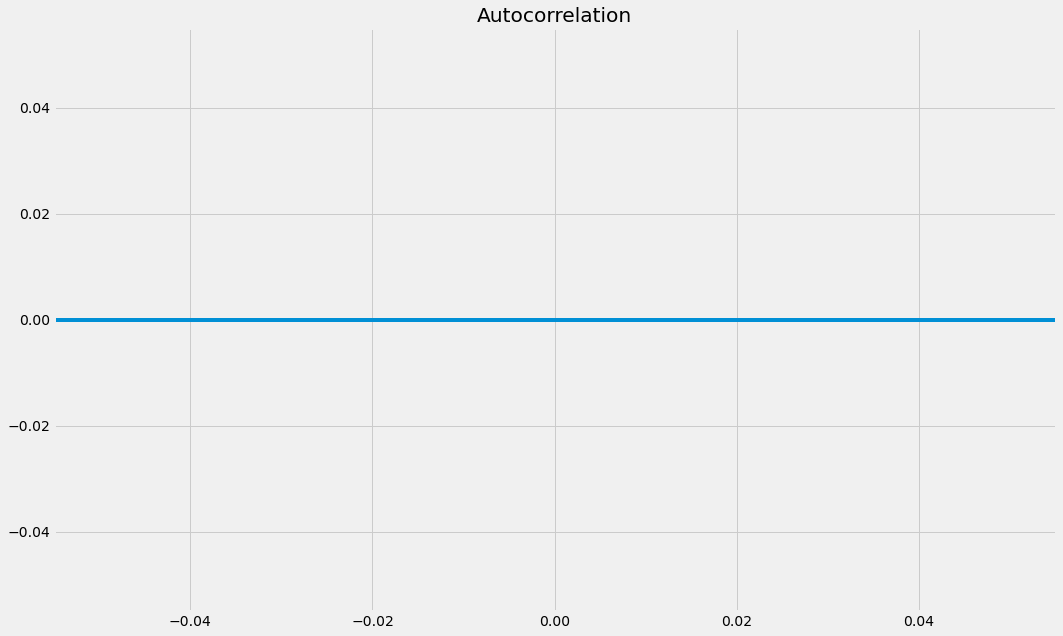

In [40]:
fig2, ax = plt.subplots(figsize=(16,10))
fig2 = sm.graphics.tsa.plot_acf(second_pair['Spread Returns'], ax = ax, lags = 50)

The spreads returns shows no autocorrelation, let's look at the Augmented Dickey Fuller Test. 

In [41]:
ADF_spread2 = sm.tsa.stattools.adfuller(second_pair['Spread Returns'].dropna().values)
print("ADF Stat: {:.4f} \n p-value: {:.4f}".format(ADF_spread2[0], ADF_spread2[1]))

ADF Stat: -8.7626 
 p-value: 0.0000


With a ADF value greater less (-3.44, -2.87) which are the critical values for the sample size and (1%,5%) confidence interval for t-distribution for sample ~500. Compined with the p-value we can say with confidence that we are dealing with a stationary process here. Let's look if there is any seasonality in the price.

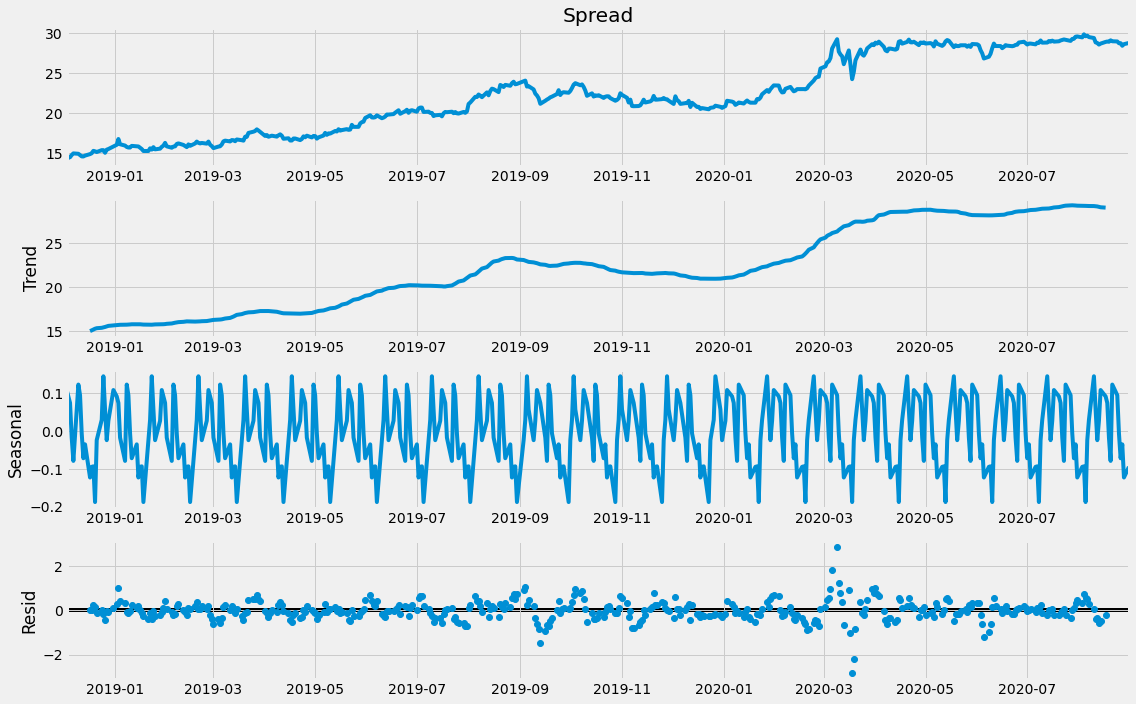

In [42]:
seasonality2 = sm.tsa.seasonal_decompose(second_pair['Spread'], model='additive', period=20)
plt.rcParams['figure.figsize'] = [16,10]
seasonality2.plot()
plt.show()

It seems like we have seasonality in our time-series so let's see what our spreads looks like once we take that seasonality out. Also, note the more erratic behavior of the residuals around the announcement of COVID.

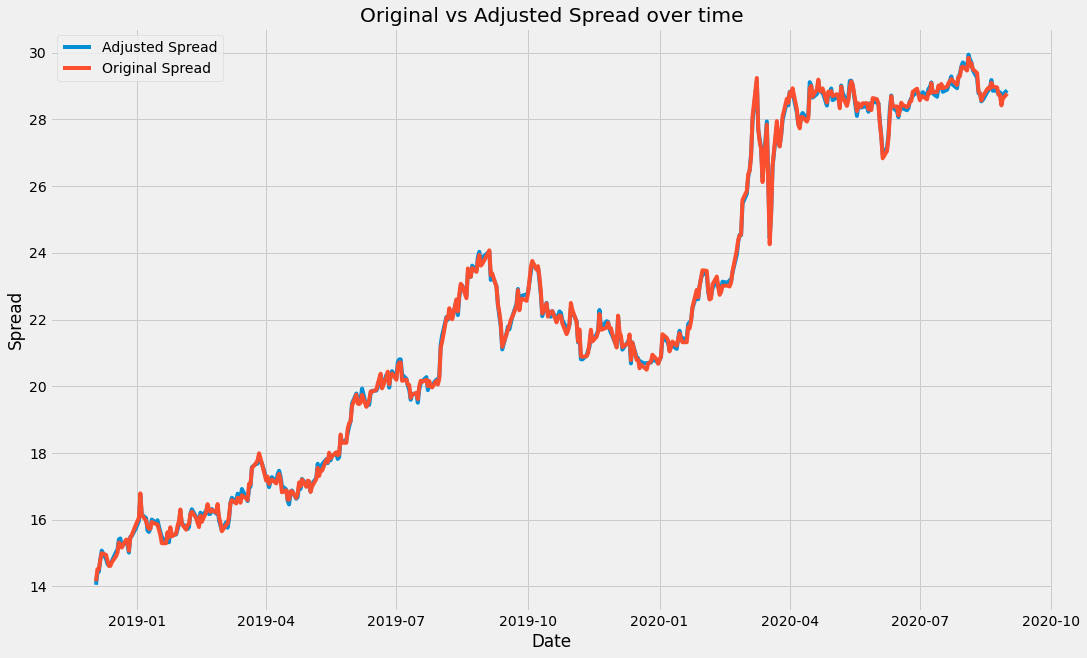

In [43]:
adj_spread2 = second_pair['Spread'] - seasonality2.seasonal.dropna().to_frame('Seasonal')['Seasonal']
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(adj_spread2, label = 'Adjusted Spread')
ax.plot(second_pair['Spread'], label = 'Original Spread')
ax.set_xlabel("Date")
ax.set_ylabel('Spread')
ax.set_title('Original vs Adjusted Spread over time')
plt.legend()

We seasonality component is too small to have a significant impact and we can observe this by looking at the correlation between the two time series. 

In [44]:
second_pair['Spread'].corr(adj_spread2)

0.9998203150680572

Which is nearly 1, if seasonality had an strong impact than we would get a smaller correlation between the two time-series, say it made it stationary. 